<a href="https://colab.research.google.com/github/ruchisurya2002-maker/Analytics-Projects-/blob/main/Complete_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

**To read the data we use pandas**

In [ ]:
data=pd.read_csv("/content/Bank_Campaign_Data.csv")

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


***We Run the Descriptive Statistics of the Data ***

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# there are no null values in data

In [ ]:
# prompt: check for missing values in the data

data.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
# prompt: check for duplicate values in entire data

duplicate_rows = data[data.duplicated()]
print("Duplicate Rows :")
print(duplicate_rows)
print("Number of duplicate rows:", len(duplicate_rows))


Duplicate Rows :
Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []
Number of duplicate rows: 0


# There are no duplicates in data

**Here we encode all the categorical Columns below **

In [ ]:
# prompt: show all job category



print(data['job'].unique())


['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [ ]:
# prompt: encode job column on nominal scale and show which job is encoded what

import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("/content/Bank_Campaign_Data.csv")

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'job' column
data['job_encoded'] = le.fit_transform(data['job'])

# Create a mapping dictionary
job_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mapping
print("Job Encoding Mapping:")
for job, code in job_mapping.items():
    print(f"{job}: {code}")

# Display the first few rows of the DataFrame to show the new 'job_encoded' column
print("\nDataFrame with Encoded Job:")
print(data.head())


Job Encoding Mapping:
admin.: 0
blue-collar: 1
entrepreneur: 2
housemaid: 3
management: 4
retired: 5
self-employed: 6
services: 7
student: 8
technician: 9
unemployed: 10
unknown: 11

DataFrame with Encoded Job:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  \
0  unknown    5   may       261         1     -1         0  unknown  no   
1  unknown    5   may       151         1     -1         0  unknown  no   
2  unknown    5   may        76         1     -1         0  unknown  no   
3  unknown    5   may        92         1   

In [ ]:
# prompt: show the categories in martial column

import pandas as pd
from sklearn.preprocessing import LabelEncoder



print(data['marital'].unique())


['married' 'single' 'divorced']


In [ ]:
# prompt: encode marital column with nominal scale

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'marital' column
data['marital_encoded'] = le.fit_transform(data['marital'])

# Create a mapping dictionary
marital_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mapping
print("Marital Encoding Mapping:")
for marital_status, code in marital_mapping.items():
    print(f"{marital_status}: {code}")

# Display the first few rows of the DataFrame to show the new 'marital_encoded' column
print("\nDataFrame with Encoded Marital Status:")
print(data.head())


Marital Encoding Mapping:
divorced: 0
married: 1
single: 2

DataFrame with Encoded Marital Status:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  \
0  unknown    5   may       261         1     -1         0  unknown  no   
1  unknown    5   may       151         1     -1         0  unknown  no   
2  unknown    5   may        76         1     -1         0  unknown  no   
3  unknown    5   may        92         1     -1         0  unknown  no   
4  unknown    5   may       198         1     -1         0  unknown  no   

   jo

In [ ]:
# prompt: show the categories in education column

print(data['education'].unique())


['tertiary' 'secondary' 'unknown' 'primary']


In [ ]:
# prompt: encode education column ,where unknown is 0, primary = 1, seconday = 2 and tertirary =3

# Create a mapping dictionary for education levels
education_mapping = {
    'unknown': 0,
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
}

# Use the mapping to encode the 'education' column
data['education_encoded'] = data['education'].map(education_mapping)

# Display the first few rows to show the new 'education_encoded' column
print("\nDataFrame with Encoded Education:")
print(data.head())



DataFrame with Encoded Education:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  \
0  unknown    5   may       261         1     -1         0  unknown  no   
1  unknown    5   may       151         1     -1         0  unknown  no   
2  unknown    5   may        76         1     -1         0  unknown  no   
3  unknown    5   may        92         1     -1         0  unknown  no   
4  unknown    5   may       198         1     -1         0  unknown  no   

   job_encoded  marital_encoded  education_encoded  
0            4  

In [ ]:
# prompt: show categories in the default column

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# ... (Your existing code)

# Assuming 'default' is the column you want to analyze
print(data['default'].unique())

# Initialize LabelEncoder for the 'default' column
le_default = LabelEncoder()

# Fit and transform the 'default' column
data['default_encoded'] = le_default.fit_transform(data['default'])

# Create a mapping dictionary for the 'default' column
default_mapping = dict(zip(le_default.classes_, le_default.transform(le_default.classes_)))

# Print the mapping for the 'default' column
print("\nDefault Encoding Mapping:")
for default_status, code in default_mapping.items():
    print(f"{default_status}: {code}")

# Display the first few rows to show the new 'default_encoded' column
print("\nDataFrame with Encoded Default:")
print(data.head())


['no' 'yes']

Default Encoding Mapping:
no: 0
yes: 1

DataFrame with Encoded Default:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ... duration  campaign  pdays  previous  poutcome   y  \
0  unknown    5  ...      261         1     -1         0   unknown  no   
1  unknown    5  ...      151         1     -1         0   unknown  no   
2  unknown    5  ...       76         1     -1         0   unknown  no   
3  unknown    5  ...       92         1     -1         0   unknown  no   
4  unknown    5  ...      198         1     -1         0   unknown  no   

  job_encoded  marital_e

In [ ]:
# prompt: show category in housing column

print(data['housing'].unique())


['yes' 'no']


In [ ]:
# prompt: encode housing column no =, yes =1

# ... (Your existing code)

print(data['housing'].unique())

# Create a mapping dictionary for housing
housing_mapping = {
    'no': 0,
    'yes': 1
}

# Use the mapping to encode the 'housing' column
data['housing_encoded'] = data['housing'].map(housing_mapping)

# Display the first few rows to show the new 'housing_encoded' column
print("\nDataFrame with Encoded Housing:")
print(data.head())


['yes' 'no']

DataFrame with Encoded Housing:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ... campaign  pdays  previous  poutcome   y job_encoded  \
0  unknown    5  ...        1     -1         0   unknown  no           4   
1  unknown    5  ...        1     -1         0   unknown  no           9   
2  unknown    5  ...        1     -1         0   unknown  no           2   
3  unknown    5  ...        1     -1         0   unknown  no           1   
4  unknown    5  ...        1     -1         0   unknown  no          11   

  marital_encoded  education_encoded  default_encode

In [ ]:
# prompt: show category in loan column and encode no =0  and yes = 1

# ... (Your existing code)

print(data['loan'].unique())

# Create a mapping dictionary for loan
loan_mapping = {
    'no': 0,
    'yes': 1
}

# Use the mapping to encode the 'loan' column
data['loan_encoded'] = data['loan'].map(loan_mapping)

# Display the first few rows to show the new 'loan_encoded' column
print("\nDataFrame with Encoded Loan:")
print(data.head())


['no' 'yes']

DataFrame with Encoded Loan:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ... pdays  previous  poutcome   y  job_encoded  \
0  unknown    5  ...    -1         0   unknown  no            4   
1  unknown    5  ...    -1         0   unknown  no            9   
2  unknown    5  ...    -1         0   unknown  no            2   
3  unknown    5  ...    -1         0   unknown  no            1   
4  unknown    5  ...    -1         0   unknown  no           11   

  marital_encoded education_encoded  default_encoded  housing_encoded  \
0               1                 3 

In [ ]:
# prompt: show categories in contact column

print(data['contact'].unique())


['unknown' 'cellular' 'telephone']


In [ ]:
# prompt: encode contact column take unknown also

# Create a mapping dictionary for contact, including 'unknown'
contact_mapping = {
    'cellular': 0,
    'telephone': 1,
    'unknown': 2
}

# Use the mapping to encode the 'contact' column
data['contact_encoded'] = data['contact'].map(contact_mapping)

# Display the first few rows to show the new 'contact_encoded' column
print("\nDataFrame with Encoded Contact:")
print(data.head())



DataFrame with Encoded Contact:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ... previous  poutcome   y  job_encoded  marital_encoded  \
0  unknown    5  ...        0   unknown  no            4                1   
1  unknown    5  ...        0   unknown  no            9                2   
2  unknown    5  ...        0   unknown  no            2                1   
3  unknown    5  ...        0   unknown  no            1                1   
4  unknown    5  ...        0   unknown  no           11                2   

  education_encoded default_encoded  housing_encoded  loan_

In [ ]:
# prompt: show category in the month column

# Assuming 'month' column needs category encoding.  Since you've already
# done similar encoding for other columns, I will apply Label Encoding.

# ... (Your existing code)

print(data['month'].unique())



['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [ ]:
# prompt: encode month column, where jan =1 till dec =12

# Create a mapping dictionary for month
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Use the mapping to encode the 'month' column
data['month_encoded'] = data['month'].map(month_mapping)

# Display the first few rows to show the new 'month_encoded' column
print("\nDataFrame with Encoded Month:")
print(data.head())



DataFrame with Encoded Month:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ... poutcome   y  job_encoded  marital_encoded  \
0  unknown    5  ...  unknown  no            4                1   
1  unknown    5  ...  unknown  no            9                2   
2  unknown    5  ...  unknown  no            2                1   
3  unknown    5  ...  unknown  no            1                1   
4  unknown    5  ...  unknown  no           11                2   

   education_encoded default_encoded housing_encoded  loan_encoded  \
0                  3               0               

In [ ]:
# prompt: show categories in p outcome

# Display unique values in the 'poutcome' column
print(data['poutcome'].unique())




['unknown' 'failure' 'other' 'success']


In [ ]:
# prompt: encode p outcome column where failure = 0, unknown =1 , others = 2, success =3

# Create a mapping dictionary for poutcome
poutcome_mapping = {
    'failure': 0,
    'unknown': 1,
    'other': 2,
    'success': 3
}

# Use the mapping to encode the 'poutcome' column
data['poutcome_encoded'] = data['poutcome'].map(poutcome_mapping)

# Display the first few rows to show the new 'poutcome_encoded' column
print("\nDataFrame with Encoded Poutcome:")
print(data.head())



DataFrame with Encoded Poutcome:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ...   y  job_encoded  marital_encoded  education_encoded  \
0  unknown    5  ...  no            4                1                  3   
1  unknown    5  ...  no            9                2                  2   
2  unknown    5  ...  no            2                1                  2   
3  unknown    5  ...  no            1                1                  0   
4  unknown    5  ...  no           11                2                  0   

   default_encoded housing_encoded loan_encoded  contact_e

In [ ]:
# prompt: show category in y column

# Assuming 'y' is the column you want to analyze and encode.
print(data['y'].unique())



['no' 'yes']


In [ ]:
# prompt: encode y column where no = 0 and yes =1

# Create a mapping dictionary for y
y_mapping = {
    'no': 0,
    'yes': 1
}

# Use the mapping to encode the 'y' column
data['y_encoded'] = data['y'].map(y_mapping)

# Display the first few rows to show the new 'y_encoded' column
print("\nDataFrame with Encoded y:")
print(data.head())



DataFrame with Encoded y:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ... job_encoded  marital_encoded  education_encoded  \
0  unknown    5  ...           4                1                  3   
1  unknown    5  ...           9                2                  2   
2  unknown    5  ...           2                1                  2   
3  unknown    5  ...           1                1                  0   
4  unknown    5  ...          11                2                  0   

   default_encoded  housing_encoded loan_encoded contact_encoded  \
0                0         

<Figure size 1500x2000 with 0 Axes>

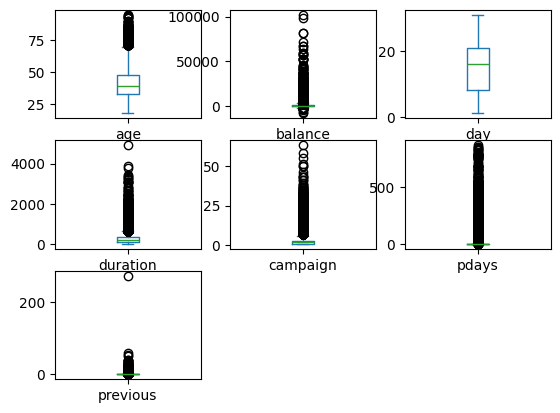

In [ ]:
# prompt: create box plot for age,balance,day,duration,campaign,pdays and previous columns

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already created and preprocessed as in the previous code.
# Select the columns for the box plot
cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Create the box plot
plt.figure(figsize=(15, 20))  # Adjust figure size as needed
data[cols].plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False)
plt.show()


There are outliers in the numeric columns like age,balance,days.duration,campaign,pdays and previous

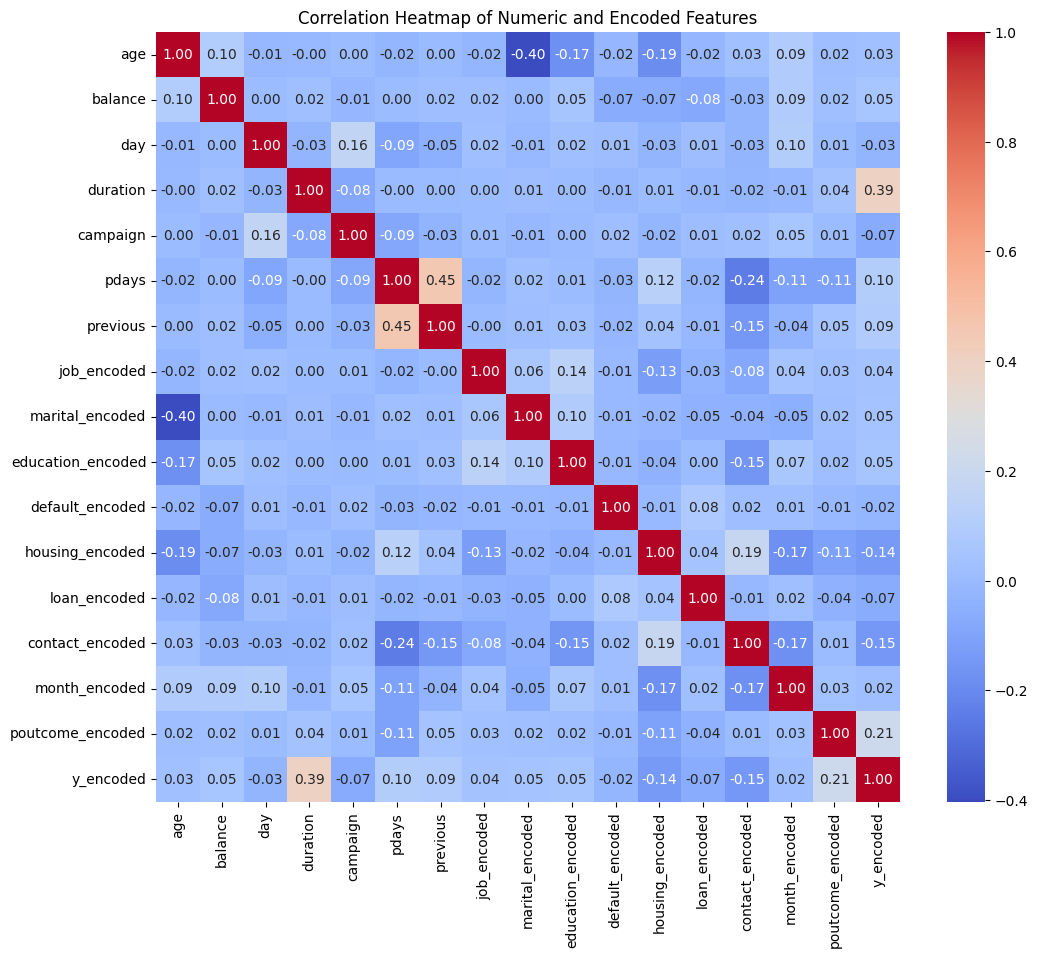

In [ ]:
# prompt: generate heat map for numeric and encoded columns

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already created and preprocessed as in your provided code.

# Select the numeric and encoded columns for the heatmap
cols_for_heatmap = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
                   'job_encoded', 'marital_encoded', 'education_encoded', 'default_encoded',
                   'housing_encoded', 'loan_encoded', 'contact_encoded', 'month_encoded',
                   'poutcome_encoded', 'y_encoded']

# Calculate the correlation matrix
correlation_matrix = data[cols_for_heatmap].corr()


# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric and Encoded Features')
plt.show()


this heat map shows correlation between different variables and we can see there is no multicollinearity between independent variables

In [ ]:
# prompt: define the dependent y and independent varibales x

# Define dependent and independent variables
X = data[['age', 'job_encoded', 'marital_encoded', 'education_encoded',
          'default_encoded', 'balance', 'housing_encoded', 'loan_encoded',
          'contact_encoded', 'day', 'month_encoded', 'duration', 'campaign',
          'pdays', 'previous', 'poutcome_encoded']]
y = data['y_encoded']


We define our independent and dependent variables

In [ ]:
y

,y_encoded
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [ ]:
X

,age,job_encoded,marital_encoded,education_encoded,default_encoded,balance,housing_encoded,loan_encoded,contact_encoded,day,month_encoded,duration,campaign,pdays,previous,poutcome_encoded
0,58,4,1,3,0,2143,1,0,2,5,5,261,1,-1,0,1
1,44,9,2,2,0,29,1,0,2,5,5,151,1,-1,0,1
2,33,2,1,2,0,2,1,1,2,5,5,76,1,-1,0,1
3,47,1,1,0,0,1506,1,0,2,5,5,92,1,-1,0,1
4,33,11,2,0,0,1,0,0,2,5,5,198,1,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,3,0,825,0,0,0,17,11,977,3,-1,0,1
45207,71,5,0,1,0,1729,0,0,0,17,11,456,2,-1,0,1
45208,72,5,1,2,0,5715,0,0,0,17,11,1127,5,184,3,3
45209,57,1,1,2,0,668,0,0,1,17,11,508,4,-1,0,1


In [ ]:
# prompt: run logistics regression using stat model where y encoded  is dependent variable

import statsmodels.api as sm

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the model summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.257645
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              y_encoded   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45194
Method:                           MLE   Df Model:                           16
Date:                Thu, 03 Apr 2025   Pseudo R-squ.:                  0.2861
Time:                        15:44:16   Log-Likelihood:                -11648.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.0608      0.136    -29.834      0.000      -4.328      -3.794
age     

There are insignificant variables in this logistic regression model with p-value>0.05 we will drop them one by one selecting the variable with the highest p-value to drop first

In [ ]:
# prompt: give confusion matrix using stats model

# Assuming 'model' is the fitted logistic regression model from statsmodels.

from sklearn.metrics import confusion_matrix

# Make predictions on the data
y_pred = model.predict(X)  # X should include the constant

# Convert probabilities to class labels (0 or 1)
y_pred_class = (y_pred > 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y, y_pred_class)

# Print the confusion matrix
print("Confusion Matrix:")
cm


Confusion Matrix:


array([[39067,   855],
       [ 3768,  1521]])

This confusion matrix shows the model prediction accuracy, it shows the true classification and misclassfication, for the model to be accruate true classification>misclassification

In [ ]:
# prompt: do  logistics regression using stats model, drop insignficant variable one. by one  using p value

import pandas as pd
def stepwise_selection(X, y, initial_list=[], threshold_in=0.05, threshold_out=0.1, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit(disp=0)
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=0)
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

# Apply stepwise selection
result = stepwise_selection(X, y)

print('resulting features:')
print(result)

# Fit the final model with selected features
X_final = X[result]
final_model = sm.Logit(y, sm.add_constant(X_final)).fit()
print(final_model.summary())


Add  poutcome_encoded               with p-value 0.0
Add  const                          with p-value 0.0
Add  duration                       with p-value 0.0
Add  contact_encoded                with p-value 4.75268e-183
Add  housing_encoded                with p-value 7.09812e-122
Add  pdays                          with p-value 9.67272e-71
Add  campaign                       with p-value 8.72642e-40
Add  loan_encoded                   with p-value 1.05234e-33
Add  marital_encoded                with p-value 4.43555e-10
Add  education_encoded              with p-value 2.15717e-08
Add  age                            with p-value 7.56924e-07
Add  balance                        with p-value 2.29177e-05
Add  previous                       with p-value 7.02749e-05
Add  day                            with p-value 0.0278616
Add  month_encoded                  with p-value 0.0370361
resulting features:
['poutcome_encoded', 'const', 'duration', 'contact_encoded', 'housing_encoded', 'pdays', 'c

After step by step dropping the insignificant variables based on highest p-value, we removed default_encoded column and job_encoded column since they have higher pvalue showing they are insignficant in deciding whether to grant term deposit or not

In [ ]:
# prompt: give confusion matrrix using stats model

# Assuming 'final_model' is the fitted logistic regression model from statsmodels after stepwise selection.
y_pred_final = final_model.predict(sm.add_constant(X_final))
y_pred_final_class = (y_pred_final > 0.5).astype(int)
cm_final = confusion_matrix(y, y_pred_final_class)
print("Confusion Matrix (after stepwise selection):")
cm_final


Confusion Matrix (after stepwise selection):


array([[39065,   857],
       [ 3777,  1512]])

This confusion matrix shows the model prediction accuracy

In [ ]:
# prompt: generate AUC of the model

from sklearn.metrics import roc_auc_score

# Assuming 'final_model' and 'X_final' are defined from the previous code
y_pred_prob = final_model.predict(sm.add_constant(X_final))

# Calculate the AUC
auc = roc_auc_score(y, y_pred_prob)
print(f"AUC of the model: {auc}")


AUC of the model: 0.8794885468145205


AUC that is area under curve tells us the accuracy of the model which is arround 87.9%